# 의사결정나무_분류 11/19 A1_노선호_빅데이터2_4일차

### 모듈 import

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split, RandomizedSearchCV
display(HTML("<style>.container { width:100% !important; }</style>"))


In [3]:
plt.rcParams['font.family']='NanumGothic'

#  STEP1 데이터 불러오기

In [63]:
df=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv",engine='python',encoding='cp949')
df.head()
## 데이터의 앞부분 5개를 확인

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
df.tail()
## 데이터의 뒷부분 5개를 확인

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [65]:
df.isnull().sum()
# 결측값이 있는지 확인

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [66]:
df.describe()
#describe() 함수로 데이터들의 정보를 한눈에 확인해보기

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [67]:
df_t_y = df[["diagnosis"]]
df_t_x = df.drop("diagnosis",axis=1, inplace=False)
# 목표변수인 diagnosis 와 나머지 설명변수들을 나눈 모습

In [81]:
df_t_y.describe() 
# 목표변수가 잘 나누어졌는지 확인하기

,diagnosis
count,569.000000
mean,0.372583
std,0.483918
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [85]:
df_t_x.describe()
# 설명변수가 잘 나누어졌는지 확인하기

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 데이터 구성하기 - 데이터 분할 

In [86]:
df_tra_x, df_test_x, df_tra_y,df_test_y = train_test_split(df_t_x,df_t_y, test_size=0.3 , random_state=1234)
df_train_x,df_validation_x,df_train_y,df_validation_y = train_test_split(df_tra_x,df_tra_y,test_size=3/7,random_state = 1234)
# 기본 x,y의 데이터를 train:test= 7:3으로 나누고 train 을 다시 한번 train: validation = 4/7:3/7 로 나눴다.

In [87]:
print('train_x 의 모양 :{}'.format(df_train_x.shape))
print('train_y 의 모양 :{}'.format(df_train_y.shape))
print('test_x 의 모양 :{}'.format(df_test_x.shape))
print('test_y 의 모양 :{}'.format(df_test_y.shape))
print('validation_x 의 모양 :{}'.format(df_validation_x.shape))
print('validation_y 의 모양 :{}'.format(df_validation_y.shape))
# 데이터의 분할이 4:3:3 으로 잘 되었는지 확인하는 모습이다.

train_x 의 모양 :(227, 30)
train_y 의 모양 :(227, 1)
test_x 의 모양 :(171, 30)
test_y 의 모양 :(171, 1)
validation_x 의 모양 :(171, 30)
validation_y 의 모양 :(171, 1)


# STEP 2. 모델생성하기

In [88]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy : {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy : {:.3f}".format(tree_uncustomized.score(df_validation_x,df_validation_y)))

# 기본 모델을 생성하여 train 데이터와 validation 데이터를 학습해본 결과 train 데이터는 100% 의 정확도가 validaion은 93.6%의 정확도가
# 나와서 따라서 Train 데이터에 과적합 되어있다.


Accuracy : 1.000
Accuracy : 0.936


In [89]:
tree_uncustomized
# 현재 생성한 모델에 대한 정보를 출력하는 모습

DecisionTreeClassifier(random_state=1234)

# STEP 2.  모델 parameter 조정

In [90]:
train_accuracy ,validation_accuracy = [],[]
para_depth = [a for a in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    validation_accuracy.append(tree.score(df_train_x,df_train_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] =para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth['test_accuracy']=validation_accuracy

In [91]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,test_accuracy
0,1,0.943,0.943
1,2,0.982,0.982
2,3,0.982,0.982
3,4,0.996,0.996
4,5,1.000,1.000
5,6,1.000,1.000
6,7,1.000,1.000
7,8,1.000,1.000
8,9,1.000,1.000
9,10,1.000,1.000


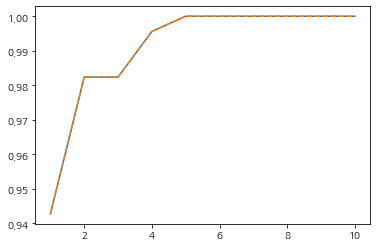

In [92]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label= 'Train_accuracy')
plt.plot(para_depth, validation_accuracy, linestyle = '--', label = 'Validation_accuracy')

In [93]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 4, random_state = 1234)

tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names =["Good","Bad"])